In [1]:
from src.funcs import *

In [2]:
# 初始化对象
vbh = VaidyaBlackHole()

In [3]:
# 吸积率 0 ~ 0.0625
mu = 5e-3
# 更新mu
vbh.update_mu(mu)

# 观测者倾角 [D]
theta0 = 17
# 更新theta0
vbh.update_theta0(theta0)

# 更新文件路径 - mu或theta0发生变化时必须运行本函数
vbh.update_filepath()

In [4]:
# 网格数量
hnum = 1000
# 打印日志
print("计算中: mu = %.2e theta0 = %02d" % (mu, theta0))
# 保存flux
vbh.save_brcd_flux_h5()

计算中: mu = 5.00e-03 theta0 = 17
Load: ./Results/brcd/c_brcd_mu_5.00e-03_theta0_17.h5
Save: ./Results/brcd/c_flux_mu_5.00e-03_theta0_17.h5


In [5]:
with h5py.File(vbh.brcdfilepath,'r') as f:
    # 图像尺寸
    hlim = f["hlim"][()]
    # 二维网格 - X轴
    px = f["px"][:]
    # 二维网格 - Y轴
    py = f["py"][:]

In [6]:
with h5py.File(vbh.fluxfilepath,'r') as f:
    # ISCO
    flux_max = f["flux_max"][()]
    # 网格数量
    obsflux_0 = f["obsflux_0"][()]
    # 直接图像 - alpha
    obsflux_1 = f["obsflux_1"][:]
obsflux = obsflux_0 / flux_max
obs1 = obsflux_1 / flux_max
obsflux[(obs1-obsflux)>0] = obs1[(obs1-obsflux)>0]

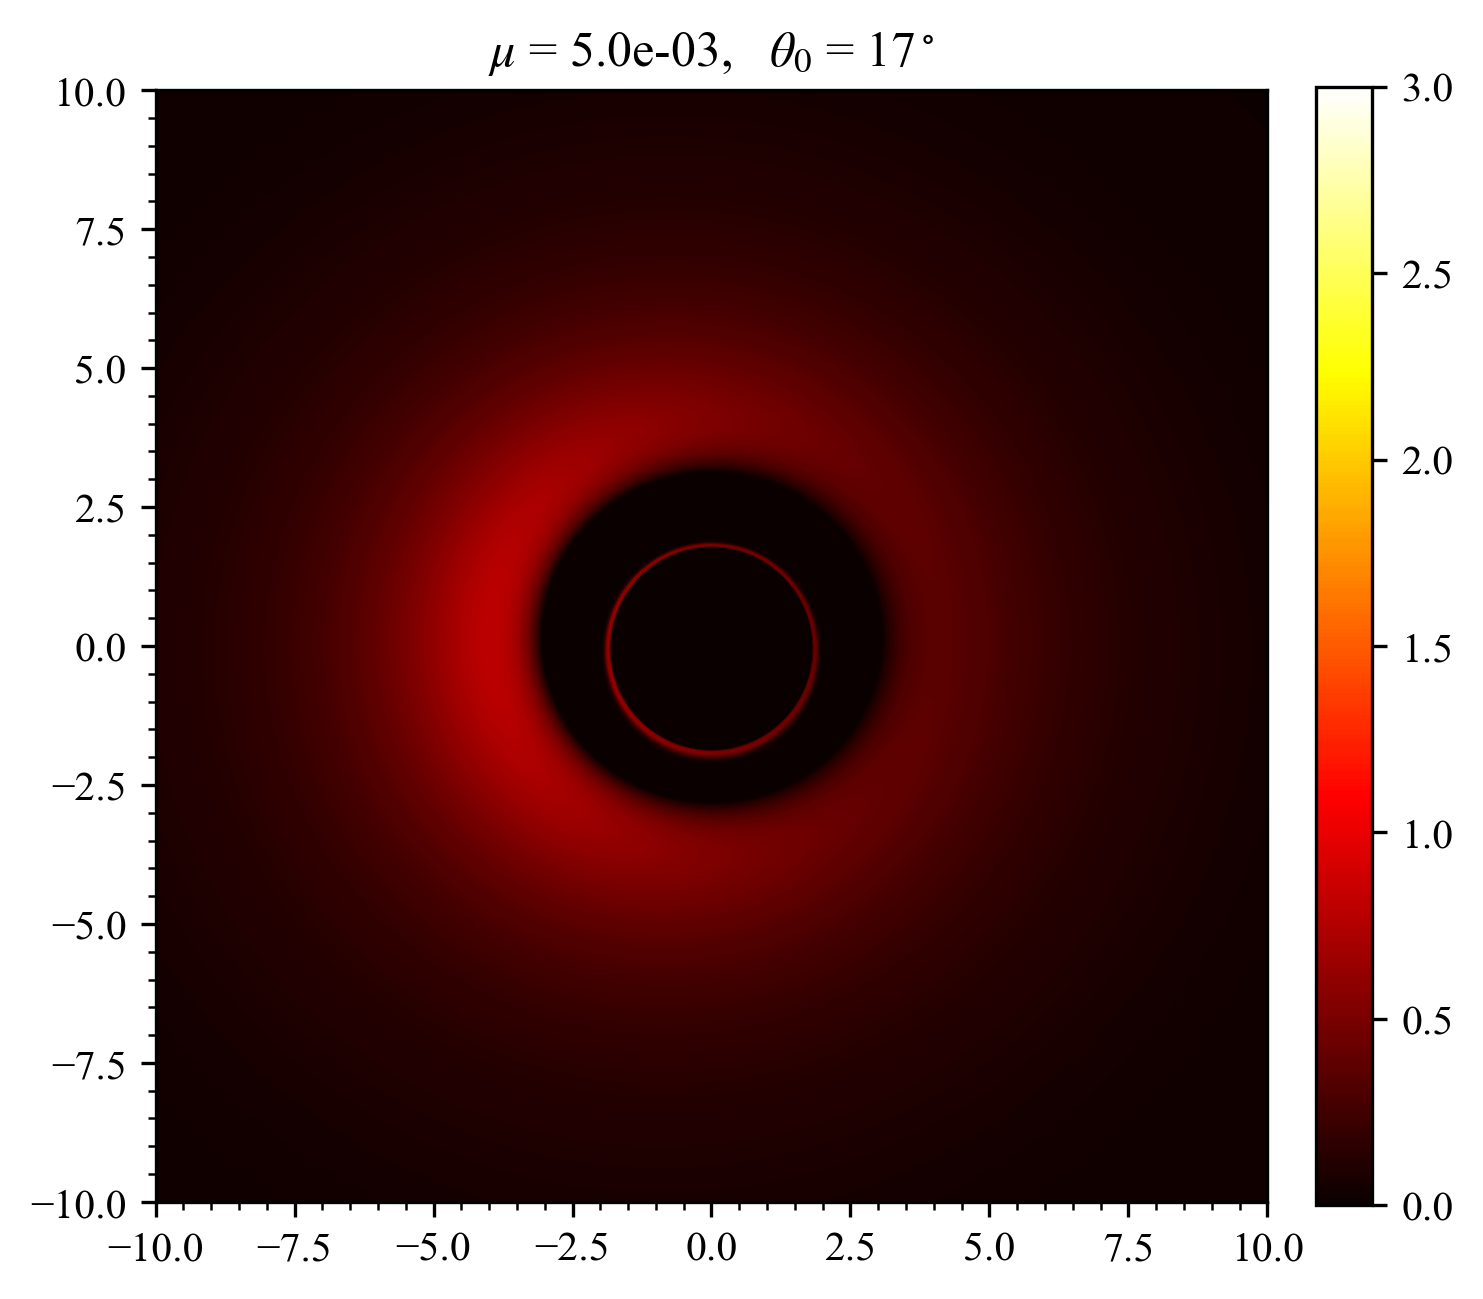

In [7]:
plt.figure(figsize=(4.8,4.8),dpi=300)

max_level = 3.0
# 需要显示的等高线
levels = np.linspace(0,max_level,300)

# 主要图像 + 次级图像
plt.contourf(px, py, obsflux, levels, cmap='hot')

# 添加颜色棒
plt.colorbar(fraction=0.046, pad=0.04, ticks=np.arange(0,max_level+.5,.5))

plt.gca().set_facecolor('k')
plt.gca().set_aspect('equal', adjustable='box')

# 设置副坐标刻度间隔
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.5))

plt.xlim(-hlim,hlim)
plt.ylim(-hlim,hlim)

plt.title(r"$\mu$ = " + "%.1e"%mu + r",$\quad \theta_0$ = " + "%d$^\circ$"%theta0)

# 调整子图参数 - 使其充满整个画布
plt.tight_layout(pad=.2)

plt.show()
# plt.savefig("imgs/brcd/c_flux_mu_{:.2e}_theta0_{:2d}.png".format(mu,theta0))